In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [2]:
def convert_iris(label):
    """
    Function to convert the labels from string to numeric
    """
    if label == "Iris-virginica":
        return 1.0
    elif label == "Iris-setosa":
        return 0.0
    elif label == "Iris-versicolor":
        return 0.0
    else:
        return label
    
def convert_breast(label):
    """
    Function to convert the labels from string to numeric
    """
    if label == "M":
        return 1.0
    elif label == "B":
        return 0.0
    else:
        return label
    
def simple_cross_validation(X_train_val, Y_train_val, k, fold):
    """
    A simple cross-validation function for k-NN.
    
    X_train_val: Features for train and val set. 
                 Shape: (num of data points, num of features)
    Y_train_val: Labels for train and val set.
                 Shape: (num of data points,)
    k:           Parameter k for k-NN.
    fold:        The number of folds to do the cross-validation.
    
    Return the average accuracy on validation set.
    """
    val_acc_list = []
    train_acc_list = []
    for i in range(0,fold):
        size_split = int(X_train_val.shape[0]/fold)
        if i == 0:
            X_test_val_s = X_train_val[0:size_split,:]
            X_train_val_s = X_train_val[size_split:X_train_val.shape[0],:]
            
            Y_test_val_s = Y_train_val[0:size_split,]
            Y_train_val_s = Y_train_val[size_split:Y_train_val.shape[0],]
            
        else:
            X_test_val_s = X_train_val[i*size_split:i*size_split+size_split,:]
            train_beg_s = X_train_val[0:i*size_split,:]
            train_end_s = X_train_val[i*size_split+size_split:X_train_val.shape[0],:]
            X_train_val_s = np.concatenate((train_beg_s,train_end_s))
        
        classifier1 = KNeighborsClassifier(algorithm='brute', n_neighbors=k)
        classifier2 = KNeighborsClassifier(algorithm='brute', n_neighbors=k)
        
        classifier1.fit(X_test_val_s,Y_test_val_s.ravel())
        classifier2.fit(X_train_val_s,Y_train_val_s.ravel())
        
        val_acc_list.append(classifier1.score(X_test_val_s,Y_test_val_s))
        train_acc_list.append(classifier2.score(X_train_val_s,Y_train_val_s))
        
    return sum(val_acc_list) / len(val_acc_list), \
           sum(train_acc_list) / len(train_acc_list)
    
def simple_GridSearchCV_fit(X_train_val, Y_train_val, k_list, fold):
    """
    A simple grid search function for k with cross-validation in k-NN.
    
    X_train_val: Features for train and val set. 
                 Shape: (num of data points, num of features)
    Y_train_val: Labels for train and val set.
                 Shape: (num of data points,)
    k_list:      The list of k values to try.
    fold:        The number of folds to do the cross-validation.
    
    Return the val and train accuracy matrix of cross-validation. 
    All combinations of k are included in the array. 
    Shape: (len(k_list), )
    """
    shape = len(k_list)
    val_acc_array = np.zeros(shape)
    train_acc_array = np.zeros(shape)
    for i in range(0,shape):
        val_acc_array[i], train_acc_array[i] = simple_cross_validation(
            X_train_val, Y_train_val, k_list[i], fold)
    return val_acc_array, train_acc_array
    
def draw_heatmap_knn(acc, acc_desc, k_list):
    """
    Draw heatmap for k-nearest neighbors hyper parameters
    """
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=k_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$k$')
    plt.title(acc_desc + ' w.r.t $k$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()
    
def draw_heatmap_linear(acc, acc_desc, depth_list):
    """
    Draw heatmap for linear classifier hyper parameters
    """
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=depth_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='depth')
    plt.title(acc_desc + ' w.r.t depth')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

# Iris Dataset

In [3]:
iris = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

Clean and Split Dataset:

In [4]:
iris['Iris-setosa'] = iris['Iris-setosa'].apply(convert_iris)
iris_XY = iris.iloc[:,0:5].values
np.random.shuffle(iris_XY)

iris_X = iris_XY[:,0:4]
iris_Y = iris_XY[:,4:5]

num_training = int(0.8*iris_X.shape[0])
num_testing = int(0.2*iris_X.shape[0])

iris_X_train = iris_X[:num_training] 
iris_Y_train = iris_Y[:num_training] 
iris_X_test = iris_X[num_training:] 
iris_Y_test = iris_Y[num_training:] 

print(iris_X_train.shape)
print(iris_Y_train.shape)
print(iris_X_test.shape)
print(iris_Y_test.shape)

(119, 4)
(119, 1)
(30, 4)
(30, 1)


# Performing KNN On Iris Data Set

In [5]:
k_list = [1,2,3,4,5,6]
val_acc_array, train_acc_array = \
    simple_GridSearchCV_fit(iris_X_train, iris_Y_train.ravel(), k_list, 6)

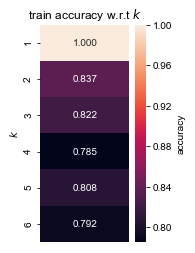

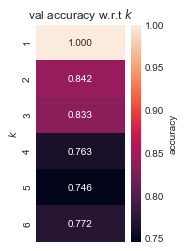

In [6]:
draw_heatmap_knn(train_acc_array.reshape(-1,1), 'train accuracy', k_list)
draw_heatmap_knn(val_acc_array.reshape(-1,1), 'val accuracy', k_list)

In [7]:
classifier = KNeighborsClassifier(6)
classifier.fit(iris_X_train, iris_Y_train.ravel())
preds = classifier.predict(iris_X_test)
asserted = []
for i in range(0,preds.shape[0]):
    if preds[i] == iris_Y_test[i]:
        asserted.append(preds[i])
test_accuracy = len(asserted)/preds.shape[0]
print("Test Accuracy: {0:f}".format(test_accuracy))

Test Accuracy: 1.000000


# Performing Decision Trees On Iris Data Set

In [8]:
classifier = tree.DecisionTreeClassifier(
                    criterion='entropy')
depth_list = [1, 2, 3, 4, 5]
params = {"max_depth": depth_list}
grid_dt_iris = GridSearchCV(classifier, params, 
                            return_train_score = True, 
                            cv = 10)
grid_dt_iris.fit(iris_X_train, iris_Y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

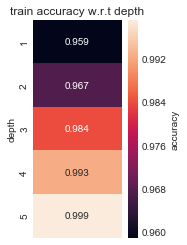

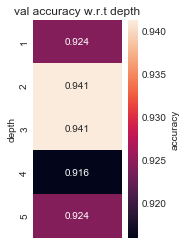

In [9]:
train_acc = grid_dt_iris.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', depth_list)

val_acc = grid_dt_iris.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', depth_list)

In [10]:
pred = grid_dt_iris.predict(iris_X_test)
asserted = []
for i in range(0,pred.shape[0]):
    if pred[i] == iris_Y_test[i]:
        asserted.append(pred[i])
test_accuracy = len(asserted)/pred.shape[0]
print("Test Accuracy: {0:f}".format(test_accuracy))
print(grid_dt_iris.best_params_)

Test Accuracy: 0.933333
{'max_depth': 2}


# Performing Random Forests On Iris Data Set

In [11]:
depth_list = [1, 2, 3, 4, 5]
params = {"max_depth": depth_list}
classifier = RandomForestClassifier(max_depth=5,
                                    random_state=0)
grid_rf_iris = GridSearchCV(classifier, params, 
                            return_train_score = True, cv = 10)
grid_rf_iris.fit(iris_X_train, iris_Y_train.ravel())

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

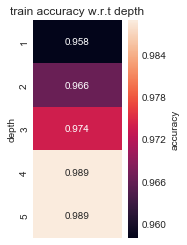

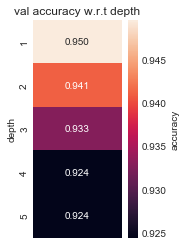

In [12]:
train_acc = grid_rf_iris.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', depth_list)

val_acc = grid_rf_iris.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', depth_list)

In [13]:
pred = grid_rf_iris.predict(iris_X_test)
asserted = []
for i in range(0,pred.shape[0]):
    if pred[i] == iris_Y_test[i]:
        asserted.append(pred[i])
test_accuracy = len(asserted)/pred.shape[0]
print("Test Accuracy: {0:f}".format(test_accuracy))
print(grid_rf_iris.get_params())

Test Accuracy: 0.966667
{'cv': 10, 'error_score': 'raise', 'estimator__bootstrap': True, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': 5, 'estimator__max_features': 'auto', 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 10, 'estimator__n_jobs': 1, 'estimator__oob_score': False, 'estimator__random_state': 0, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state

# Breast Cancer Dataset

In [14]:
breast = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data')

Clean and Split Dataset:

In [15]:
breast.dropna(inplace = True)
breast['M'] = breast['M'].apply(convert_breast)
breast_XY = pd.concat([breast.iloc[:,0:1],breast.iloc[:,2:],
                       breast.iloc[:,1:2]],axis=1).values
np.random.shuffle(breast_XY)

breast_X = breast_XY[:,0:31]
breast_Y = breast_XY[:,31:]

num_training = int(0.8*breast_X.shape[0])
num_testing = int(0.2*breast_X.shape[0])

breast_X_train = breast_X[:num_training] 
breast_Y_train = breast_Y[:num_training] 
breast_X_test = breast_X[num_training:] 
breast_Y_test = breast_Y[num_training:] 

print(breast_X_train.shape)
print(breast_Y_train.shape)
print(breast_X_test.shape)
print(breast_Y_test.shape)

(454, 31)
(454, 1)
(114, 31)
(114, 1)


# Performing KNN On Breast Cancer Data Set

In [16]:
k_list = [1,2,3,4,5,6]
val_acc_array, train_acc_array = \
    simple_GridSearchCV_fit(breast_X_train, breast_Y_train.ravel(), k_list, 6)

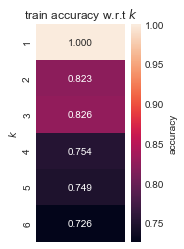

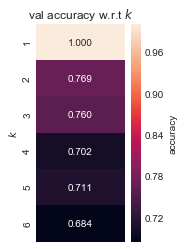

In [17]:
draw_heatmap_knn(train_acc_array.reshape(-1,1), 'train accuracy', k_list)
draw_heatmap_knn(val_acc_array.reshape(-1,1), 'val accuracy', k_list)

In [18]:
classifier = KNeighborsClassifier(6)
classifier.fit(breast_X_train, breast_Y_train.ravel())
preds = classifier.predict(breast_X_test)
asserted = []
for i in range(0,preds.shape[0]):
    if preds[i] == breast_Y_test[i]:
        asserted.append(preds[i])
test_accuracy = len(asserted)/preds.shape[0]
print("Test Accuracy: {0:f}".format(test_accuracy))

Test Accuracy: 0.736842


# Performing Decision Trees On Breast Cancer Data Set

In [19]:
classifier = tree.DecisionTreeClassifier(criterion='entropy')
depth_list = [1, 2, 3, 4, 5]
params = {"max_depth": depth_list}
grid_dt_breast = GridSearchCV(classifier, params, return_train_score = True, cv = 10)
grid_dt_breast.fit(breast_X_train, breast_Y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

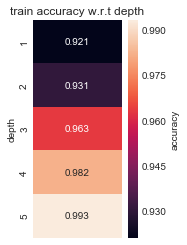

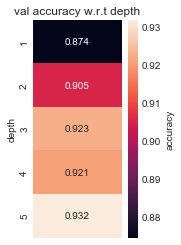

In [20]:
train_acc = grid_dt_breast.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', depth_list)

val_acc = grid_dt_breast.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', depth_list)

In [21]:
pred = grid_dt_breast.predict(breast_X_test)
asserted = []
for i in range(0,pred.shape[0]):
    if pred[i] == breast_Y_test[i]:
        asserted.append(pred[i])
test_accuracy = len(asserted)/pred.shape[0]
print(test_accuracy)
print(grid_dt_breast.best_params_)

0.9385964912280702
{'max_depth': 5}


# Performing Random Forests On Breast Cancer Data Set

In [22]:
depth_list = [1, 2, 3, 4, 5]
params = {"max_depth": depth_list}
classifier = RandomForestClassifier(max_depth=5, random_state=0)
grid_rf_breast = GridSearchCV(classifier, params, return_train_score = True, cv = 10)
grid_rf_breast.fit(breast_X_train, breast_Y_train.ravel())

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

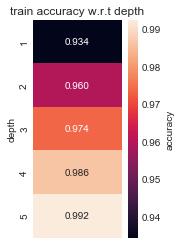

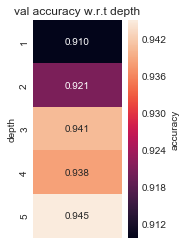

In [23]:
train_acc = grid_rf_breast.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', depth_list)

val_acc = grid_rf_breast.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', depth_list)

In [24]:
pred = grid_rf_breast.predict(breast_X_test)
asserted = []
for i in range(0,pred.shape[0]):
    if pred[i] == breast_Y_test[i]:
        asserted.append(pred[i])
test_accuracy = len(asserted)/pred.shape[0]
print("Test Accuracy: {0:f}".format(test_accuracy))
print(grid_rf_breast.get_params())

Test Accuracy: 0.964912
{'cv': 10, 'error_score': 'raise', 'estimator__bootstrap': True, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': 5, 'estimator__max_features': 'auto', 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 10, 'estimator__n_jobs': 1, 'estimator__oob_score': False, 'estimator__random_state': 0, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state

# Mammographic Masses Dataset

In [25]:
mammograph = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/mammographic-masses/mammographic_masses.data')
mammograph = mammograph.replace({'?':np.nan}).dropna()
mammograph_XY = mammograph.iloc[:,0:5].values
np.random.shuffle(mammograph_XY)

mammograph_X = mammograph_XY[:,0:4]
mammograph_Y = mammograph_XY[:,4:5]

num_training = int(0.8*mammograph_X.shape[0])
num_testing = int(0.2*mammograph_X.shape[0])

mam_X_train = mammograph_X[:num_training] 
mam_Y_train = mammograph_Y[:num_training] 
mam_X_test = mammograph_X[num_training:] 
mam_Y_test = mammograph_Y[num_training:]  

print(mam_X_train.shape)
print(mam_Y_train.shape)
print(mam_X_test.shape)
print(mam_Y_test.shape)

(663, 4)
(663, 1)
(166, 4)
(166, 1)


# Performing KNN On Mammograph Data Set

In [26]:
k_list = [1,2,3,4,5,6]
val_acc_array, train_acc_array = \
    simple_GridSearchCV_fit(mam_X_train, mam_Y_train.ravel(), k_list, 3)

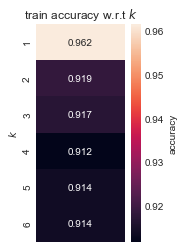

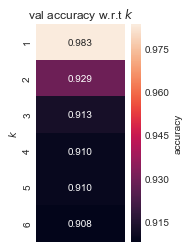

In [27]:
draw_heatmap_knn(train_acc_array.reshape(-1,1), 'train accuracy', k_list)
draw_heatmap_knn(val_acc_array.reshape(-1,1), 'val accuracy', k_list)

In [28]:
classifier = KNeighborsClassifier()
classifier.fit(mam_X_train, mam_Y_train.ravel())
preds = classifier.predict(mam_X_test)
asserted = []
for i in range(0,preds.shape[0]):
    if preds[i] == mam_Y_test[i]:
        asserted.append(preds[i])
test_accuracy = len(asserted)/preds.shape[0]
print("Test Accuracy: {0:f}".format(test_accuracy))

Test Accuracy: 0.891566


# Performing Decision Trees On Mammograph Data Set

In [29]:
classifier = tree.DecisionTreeClassifier(criterion='entropy')
depth_list = [1, 2, 3, 4, 5]
params = {"max_depth": depth_list}
grid_dt_mam = GridSearchCV(classifier, params, return_train_score = True, cv = 5)
grid_dt_mam.fit(mam_X_train, mam_Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

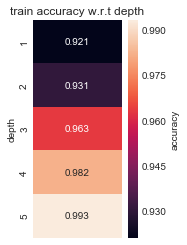

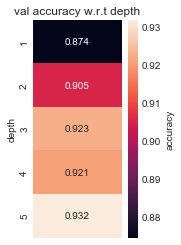

In [30]:
train_acc = grid_dt_breast.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', depth_list)

val_acc = grid_dt_breast.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', depth_list)

In [31]:
pred = grid_dt_mam.predict(mam_X_test)
asserted = []
for i in range(0,pred.shape[0]):
    if pred[i] == mam_Y_test[i]:
        asserted.append(pred[i])
test_accuracy = len(asserted)/pred.shape[0]
print("Test Accuracy: {0:f}".format(test_accuracy))
print(grid_dt_mam.best_params_)

Test Accuracy: 0.897590
{'max_depth': 1}


# Performing Random Forests On Mammograph Data Set

In [32]:
depth_list = [1, 2, 3, 4, 5]
params = {"max_depth": depth_list}
classifier = RandomForestClassifier(max_depth=5, random_state=0)
grid_rf_mam = GridSearchCV(classifier, params, return_train_score = True)
grid_rf_mam.fit(mam_X_train, mam_Y_train.ravel())

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

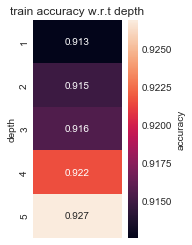

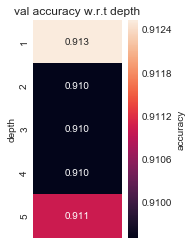

In [33]:
train_acc = grid_rf_mam.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', depth_list)

val_acc = grid_rf_mam.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', depth_list)

In [34]:
pred = grid_rf_mam.predict(mam_X_test)
asserted = []
for i in range(0,pred.shape[0]):
    if pred[i] == mam_Y_test[i]:
        asserted.append(pred[i])
test_accuracy = len(asserted)/pred.shape[0]
print("Test Accuracy: {0:f}".format(test_accuracy))
print(grid_rf_mam.get_params())

Test Accuracy: 0.897590
{'cv': None, 'error_score': 'raise', 'estimator__bootstrap': True, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': 5, 'estimator__max_features': 'auto', 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 10, 'estimator__n_jobs': 1, 'estimator__oob_score': False, 'estimator__random_state': 0, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_sta